# Polynomial Regression

$$Y = b_0 + b_1 X_1 + b_2 X_1^2 + \cdots + b_n X_1^n$$

Problem statement: Predicting the salaries according to positions.


# Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


the first column is redundant as we already have a number for each Position.

In [2]:
# using the slice operator in "x" is important 
# It makes the output 2D.
x = df.iloc[:, 1:-1].values
print("x:\n", x)
y = df.iloc[:, -1].values
print("\n y:\n", y)

x:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

 y:
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### We are not splitting the data into training and testing data Bcz the data is so small. we will directly predict for a new value individually.

## Training the Linear Regression Model

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

 # Model for Polynomial Regression 
 
 $$Y = b_0 + b_1 X_1 + b_2 X_1^2 + \cdots + b_n X_1^n$$
 
***As you can see Polynomial equation is a linear combination of powered features.***

Hence first we need to create a Matrix of polynomial features

In [4]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x)

In [5]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Now fitting a linear model onto it.

In [6]:
from sklearn.linear_model import LinearRegression
lr_2 = LinearRegression()
lr_2.fit(x_poly, y)

LinearRegression()

### Visualizing the Linear Regression Model

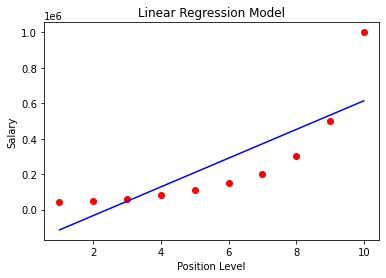

In [7]:
plt.scatter(x,y, color='red')
plt.plot(x, lr.predict(x), color='blue')
plt.title("Linear Regression Model")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Visualizing the Polynomial Regression Model

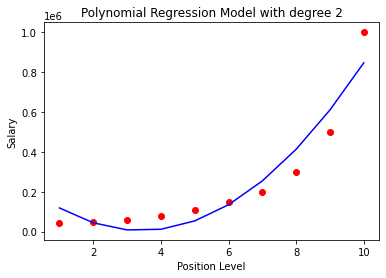

In [8]:
plt.scatter(x,y, color='red')
plt.plot(x, lr_2.predict(x_poly), color='blue')
plt.title("Polynomial Regression Model with degree 2")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Increasing Degree of Polynomial Eqn from 2 to 4.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
pf_4 = PolynomialFeatures(degree=4)
x_poly_4 = pf_4.fit_transform(x)

### Creating the Polynomial Regression Model

In [10]:
lr_4 = LinearRegression()
lr_4.fit(x_poly_4, y)

LinearRegression()

## Visualizing the results for polynomial with degree 4 

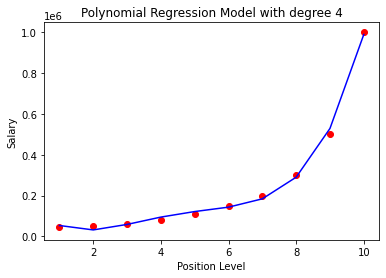

In [11]:
plt.scatter(x,y, color='red')
plt.plot(x, lr_4.predict(x_poly_4), color='blue')
plt.title("Polynomial Regression Model with degree 4")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

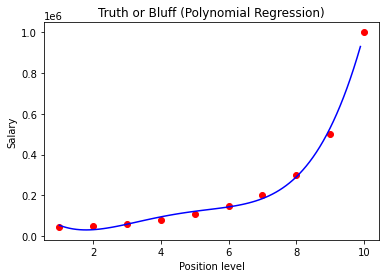

In [17]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lr_4.predict(pf_4.fit_transform(x_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting the salary using Linear Regression

In [13]:
lr.predict([[6.5]])

array([330378.78787879])

In [14]:
lr_4.predict(pf_4.fit_transform([[6.5]]))

array([158862.45265155])